# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from fuzzywuzzy import process
warnings.simplefilter("ignore")


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
df = pd.read_excel("/content/candyhierarchy2017.xlsx")
df.head(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [ ]:
df.shape

(2460, 120)

In [ ]:
df.isna().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

In [ ]:
df.nunique()

Internal ID                 2460
Q1: GOING OUT?                 2
Q2: GENDER                     4
Q3: AGE                      106
Q4: COUNTRY                  128
                            ... 
Q12: MEDIA [Daily Dish]        1
Q12: MEDIA [Science]           1
Q12: MEDIA [ESPN]              1
Q12: MEDIA [Yahoo]             1
Click Coordinates (x, y)     952
Length: 120, dtype: int64

In [ ]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

There are so many null and missing values and wrong ranges

# cleaning

### 4- drop all the useless columns and  rows with too much NaN ,
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN
- rename columns for easy access

In [ ]:
#Renaming Column
df = df.rename(columns={'Q1: GOING OUT?':'Going out', 'Q2: GENDER':'Gender', 'Q3: AGE':'Age',
'Q4: COUNTRY':'Country','Q5: STATE, PROVINCE, COUNTY, ETC':'State', 'Q7: JOY OTHER':'Joy other',
'Q8: DESPAIR OTHER':'Despair other', 'Q9: OTHER COMMENTS':'Other comments',
'Q10: DRESS':'Dress','Q11: DAY':'Day', 'Q12: MEDIA [Science]':'Science',
'Q12: MEDIA [Daily Dish]':'Daily Dish', 'Q12: MEDIA [ESPN]':'ESPN',
'Q12: MEDIA [Yahoo]':'Yahoo'})
df.columns=df.columns.str.strip('Q6 |')
df.head()

,Internal ID,Going out,Gender,Age,Country,State,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,...,Despair other,Other comments,Dress,Unnamed: 113,Day,Daily Dish,Science,ESPN,Yahoo,"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [ ]:
# Drop useless column like Inernal ID& x,y corr and columns with so null values
df = df.drop(columns=['Internal ID','Joy other','Despair other','Other comments','Unnamed: 113','Click Coordinates (x, y)'])

In [ ]:
df.head()

,Going out,Gender,Age,Country,State,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Daily Dish,Science,ESPN,Yahoo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,...,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN


In [ ]:
df.dropna(subset=df.columns[5:-6],how='all',inplace=True)

In [ ]:
df.reset_index(inplace=True,drop=True)
df.head()

,Going out,Gender,Age,Country,State,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Daily Dish,Science,ESPN,Yahoo
0,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
1,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,...,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
2,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN
3,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,NaN,...,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,1.0,NaN,NaN
4,No,Male,33,canada,ontario,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Blue and black,Friday,NaN,1.0,NaN,NaN


### 5 - clean `going out` column
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [ ]:
df["Going out"].value_counts()

Going out
No     1500
Yes     239
Name: count, dtype: int64

In [ ]:
df["Going out"].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['Going out']=df["Going out"].fillna('Not Decided Yet')
df['Going out'].unique()

array(['No', 'Yes', 'Not Decided Yet'], dtype=object)

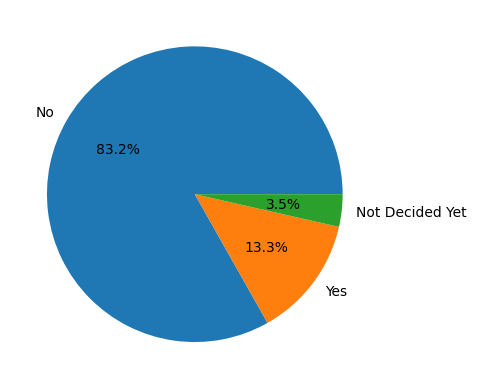

In [ ]:
#Plotting
insights=round(df['Going out'].value_counts(normalize=True)*100,2)
plt.pie(insights.values,labels=insights.index,autopct='%2.1f%%')
plt.show()

a lot of the people answered the survey are not going out

### 6 - clean ` gender` column
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female', "I'd rather not say", 'Other', nan], dtype=object)

In [ ]:
df['Gender']=df['Gender'].fillna(method='bfill',axis=0)
#backfill / bfill: use next valid observation to fill gap

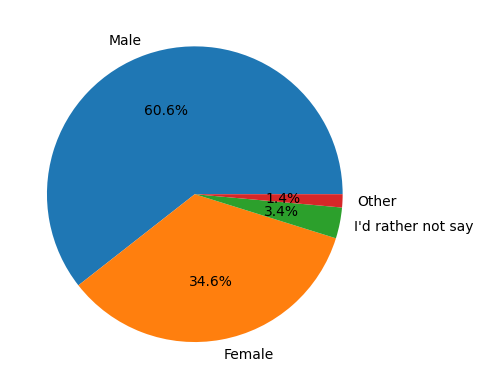

In [ ]:
#plotting
insights2=round(df['Gender'].value_counts(normalize=True)*100,2)
plt.pie(insights2.values,labels=insights2.index,autopct='%2.1f%%')
plt.show()

Most of them are males

### 7 - clean ` age` column
> tip : note the type of age column , and NaN values
 - try to use `to_numeric`
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [ ]:
df['Age'].info()
df['Age']=pd.to_numeric(df['Age'],errors='coerce')

<class 'pandas.core.series.Series'>
RangeIndex: 1803 entries, 0 to 1802
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
1767 non-null   object
dtypes: object(1)
memory usage: 14.2+ KB


In [ ]:
df['Age'].value_counts()

Age
40.0      66
37.0      66
43.0      64
44.0      62
34.0      61
          ..
1000.0     1
99.0       1
77.0       1
4.0        1
312.0      1
Name: count, Length: 81, dtype: int64

In [ ]:
df['Age'].unique()

array([  44. ,   40. ,   23. ,    nan,   33. ,   53. ,   56. ,   64. ,
         43. ,   37. ,   59. ,   48. ,   45. ,   49. ,   34. ,   35. ,
         38. ,   58. ,   50. ,   47. ,   52. ,   63. ,   65. ,   41. ,
         31. ,   61. ,   46. ,   54. ,   62. ,   29. ,   42. ,   39. ,
         36. ,   32. ,   28. ,   69. ,   67. ,   30. ,   25. ,   22. ,
         51. ,   70. ,   24. ,   27. ,   18. ,   19. ,   57. ,   66. ,
         12. ,   60. ,   55. ,   21. ,   11. ,   68. ,   20. ,    6. ,
         10. ,   71. ,   90. ,   13. ,   26. ,  312. ,   72. ,   99. ,
          9. ,   88. ,   39.4,   74. ,  102. ,   15. ,    8. ,   75. ,
         17. ,    7. ,   14. ,   76. ,  100. , 1000. ,   16. ,   77. ,
          4. ,   73. ])

In [ ]:
df['Age'].describe()

count    1748.000000
mean       43.474485
std        26.649718
min         4.000000
25%        35.000000
50%        42.000000
75%        50.000000
max      1000.000000
Name: Age, dtype: float64

there are outliers

<Axes: ylabel='Age'>

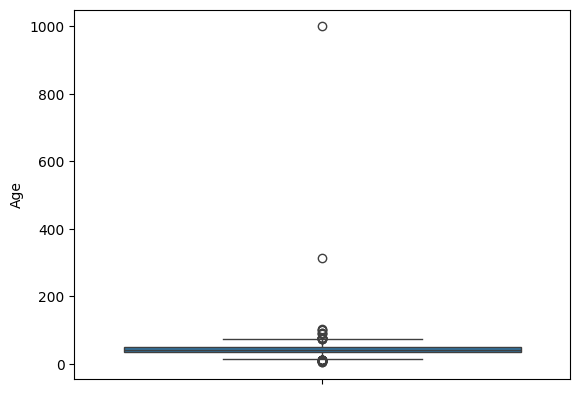

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5*IQR
r = Q3 + 1.5*IQR

In [ ]:
filt = (df['Age'] < l) | (df['Age'] > r)
df.loc[filt, 'Age'] = np.nan
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df["Age"].describe()

count    1803.000000
mean       42.898828
std        10.542512
min        13.000000
25%        36.000000
50%        42.898828
75%        50.000000
max        72.000000
Name: Age, dtype: float64

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [ ]:
df['Country'].unique()

array(['USA ', 'us', 'usa', nan, 'canada', 'Canada', 'Us', 'US', 'Murica',
       'USA', 'uk', 'United States', 'united states', 'Usa',
       'United staes', 'United Kingdom', 'United States of America',
       'UAE', 'United States ', 'England', 'canada ', 'United states',
       'u.s.a.', 'USAUSAUSA', 'america', 'france',
       'United States of America ', 'U.S.A.', 'Mexico', 'Canada ',
       'united states of america', 'US of A', 'UK', 'Unites States',
       'The United States', 'North Carolina ', 'Netherlands', 'Europe',
       'Earth', 'U S', 'u.s.', 'Costa Rica',
       'The United States of America', 'cascadia', 'insanity lately',
       'Greece', 'USA? Hard to tell anymore..', "'merica", 'Pittsburgh',
       'United State', 'France', 'U.S.', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sates', 'Korea', 'Australia',
       'California', 'Japan', 'USa', 'South africa',
       'I pretend to be from Canada, but I am really from the United States.',
 

In [ ]:
df['Country'] = df['Country'].str.strip().str.lower()

In [ ]:
df['Country']

0          usa
1           us
2          usa
3          NaN
4       canada
         ...  
1798       usa
1799       usa
1800       usa
1801       usa
1802       usa
Name: Country, Length: 1803, dtype: object

In [ ]:
countries = pd.Series(['usa', 'united states of america','america','united kingdom england', 'hong kong', 'china', 'sweden', 'spain',
                       'ireland', 'taiwan', 'singapore', 'netherlands',  'switzerland', 'denmark', 'scotland', 'canada', 'iceland', 'south africa',
                       'japan', 'greece', 'costa rica', 'germany', 'finland','indonesia', 'south korea', 'france', 'mexico'])


In [ ]:
# Record Linkage Process
for country in countries:
    matches = process.extract(country, df['Country'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df.loc[df['Country'] == potential_match[0], 'Country'] = country


In [ ]:
df['Country'].unique()

array(['usa', nan, 'canada', 'murica', 'uk', 'america', 'uae',
       'united kingdom england', 'u.s.a.', 'france', 'mexico',
       'north carolina', 'netherlands', 'europe', 'earth', 'costa rica',
       'cascadia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', 'canae', 'new york',
       'trumpistan', 'iceland', 'south korea', 'australia', 'california',
       'japan', 'south africa', 'scotland', 'denmark', 'switzerland',
       'new jersey', 'germany', 'endland', 'atlantis', 'murrika',
       'alaska', 'singapore', 'taiwan', 'china', 'spain', 'narnia',
       'u s a', 'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [ ]:
df['Country'].value_counts()

Country
usa                               979
america                           557
canada                            160
uk                                 12
u.s.a.                              8
germany                             7
netherlands                         4
iceland                             4
france                              3
scotland                            3
japan                               3
denmark                             2
switzerland                         2
mexico                              2
australia                           2
south korea                         2
new jersey                          1
murica                              1
endland                             1
atlantis                            1
murrika                             1
united kingdom england              1
singapore                           1
taiwan                              1
china                               1
spain                               1
narn

In [ ]:
#pip install fuzzywuzzy

In [ ]:
# Mapping The same country into on name and replace nan with other
mapping = {'murica':'usa', 'united states of america':'usa','america':'usa', 'u.s.a.':'usa',
'north carolina':'usa', 'usa? hard to tell anymore..':'usa', 'pittsburgh':'usa', 'new york':'usa', 'trumpistan':'usa',
          'california':'usa', 'ud':'usa', 'new jersey':'usa', 'endland':'uk', 'soviet canuckistan':'canada',
           'u s a':'usa', 'united kingdom england':'uk', 'u.k.':'uk', 'cascadia':'usa'}
df['Country'] = df['Country'].replace(mapping)

In [ ]:
# Replace Other With Nan
df.Country[~df['Country'].isin(['usa', 'uk','canada'])]='other'

In [ ]:
df['Country'] =df['Country'].str.upper()
df['Country'].value_counts()

Country
USA       1554
CANADA     160
OTHER       75
UK          14
Name: count, dtype: int64

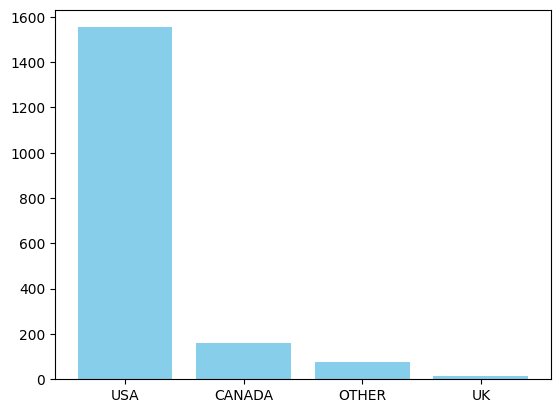

In [ ]:
x=df['Country'].value_counts()
plt.bar(x.index, x.values, color='skyblue')
plt.show()

***9 - clean area column***

In [ ]:
df['State'].unique()

array(['NM', 'or', 'exton pa', nan, 'ontario', 'Ontario', 'Wa', 'Quebec',
       'NY', 'California', 'Texas', 'NEW YORK', 'CO', 'aberdeenshire',
       'Alberta', 'Wisconsin, 53705', 'RI', 'minnesota', 'Michigan',
       'Florida', 'New Jersey', 'Colorado', 'Los Angeles, California',
       'CA', 'Chicago, Illinois', 'Wisconsin', 'Minnesota ', 'London',
       'mn', 'TEXAS', 'District of Columbia', 'Washington',
       'Massachusetts ', 'OR', 'Illinois', 'New York', 'massachusetts',
       'Abu Dhabi', 'TX', 'Dc', 'VA', 'MN', 'yukon', 'Pennsylvania ',
       'MD', 'Virginia', 'Alberta ', 'OXFORDSHIRE', 'DC', 'Iowa', 'Mn',
       'TN', 'Ohio', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'Ny',
       'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'north carolina', 'Tennessee ',
       'Knox county, Tennessee', 'New Mexico', 'Maine', 'maine',
       'Virginia, Arlington', 'WA', 'Illinois ', 'Il', 'New Hamp

In [ ]:
df.drop('State',axis ='columns',inplace=True)

Soooooooooo Many diff Values

In [ ]:
df.head()

,Going out,Gender,Age,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Daily Dish,Science,ESPN,Yahoo
0,No,Male,44.000000,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
1,No,Male,40.000000,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
2,No,Male,23.000000,USA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN
3,No,Male,42.898828,OTHER,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,1.0,NaN,NaN
4,No,Male,33.000000,CANADA,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Blue and black,Friday,NaN,1.0,NaN,NaN


### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [ ]:
#df.columns.get_loc('York Peppermint Patties') --> 106
#df.columns.get_loc('100 Grand Bar') --> 4


In [ ]:
df = df.drop(df[df.iloc[:,4:106].isnull().all(axis=1)].index)

In [ ]:
df['100 Grand Bar'].unique()
# fill nan with "MEH" between JOY , DESPAIR

array(['MEH', 'JOY', nan, 'DESPAIR'], dtype=object)

In [ ]:
df.iloc[:,4:106]=df.iloc[:,4:106].fillna('MEH')
df.iloc[:,4:106].isnull().sum()

100 Grand Bar                                                                        0
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    0
Any full-sized candy bar                                                             0
Black Jacks                                                                          0
Bonkers (the candy)                                                                  0
                                                                                    ..
Vials of pure high fructose corn syrup, for main-lining into your vein               0
Vicodin                                                                              0
Whatchamacallit Bars                                                                 0
White Bread                                                                          0
Whole Wheat anything                                                                 0
Length: 102, dtype: int64

### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [ ]:
df['Dress'].unique()

array(['White and gold', nan, 'Blue and black'], dtype=object)

In [ ]:
df['Dress']=df['Dress'].fillna('Unknown')

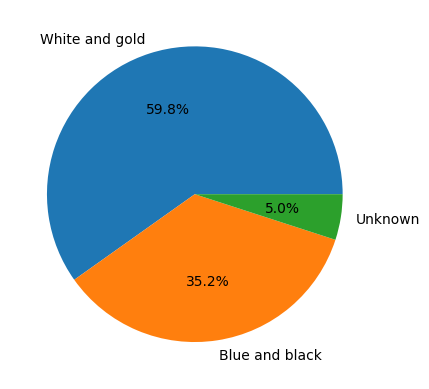

In [ ]:
#plotting
insights4=round(df['Dress'].value_counts(normalize=True)*100,2)
plt.pie(insights4.values,labels=insights4.index,autopct='%2.1f%%')
plt.show()

White and gold is the most

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [ ]:
df['Day'].isna().sum()

70

In [ ]:

df['Day']=df['Day'].fillna('Friday')
df['Day'].value_counts()

Day
Friday    1160
Sunday     642
Name: count, dtype: int64

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values
- all the column are cleaing and ready for the next step `EDA`

In [ ]:
df.isna().sum()

Going out           0
Gender              0
Age                 0
Country             0
100 Grand Bar       0
                 ... 
Day                 0
Daily Dish       1717
Science           444
ESPN             1703
Yahoo            1735
Length: 113, dtype: int64

In [ ]:
# So many nan in last 4 columns
df.drop(columns=['Daily Dish', 'Science', 'ESPN', 'Yahoo'],inplace=True)

In [ ]:
df.head(5)

,Going out,Gender,Age,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),...,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day
0,No,Male,44.000000,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,...,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
1,No,Male,40.000000,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,...,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,No,Male,23.000000,USA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,...,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday
3,No,Male,42.898828,OTHER,JOY,DESPAIR,JOY,MEH,MEH,MEH,...,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,Unknown,Friday
4,No,Male,33.000000,CANADA,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,...,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Blue and black,Friday


In [ ]:
choclets=df.iloc[:,4:106]
df2=pd.DataFrame(data=choclets)
#df2.head()

In [ ]:
#df2 = df2.transpose()
#df2

In [ ]:
#df2.index

In [ ]:
thee= df2.iloc[:,0:-1]
joy,despair,candy = [],[],[]
for i in thee:
    candy.append(i[0:])
    joy.append(df[i].value_counts()['JOY'])
    despair.append(df[i].value_counts()['DESPAIR'])

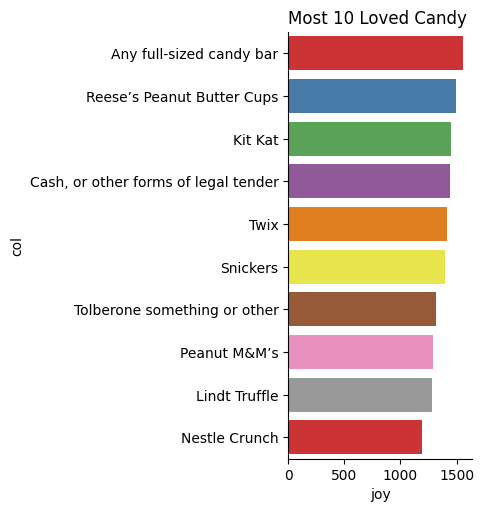

In [ ]:
dd = pd.DataFrame()
dd['col'] = candy
dd['joy']=joy
dd['despair'] =despair
dd.sort_values(['joy','despair'],ascending=[False,False],inplace=True)
sns.catplot(y='col',x='joy',data=dd[:10],kind='bar',palette='Set1',margin_titles=True)
plt.title('Most 10 Loved Candy ')
plt.show()


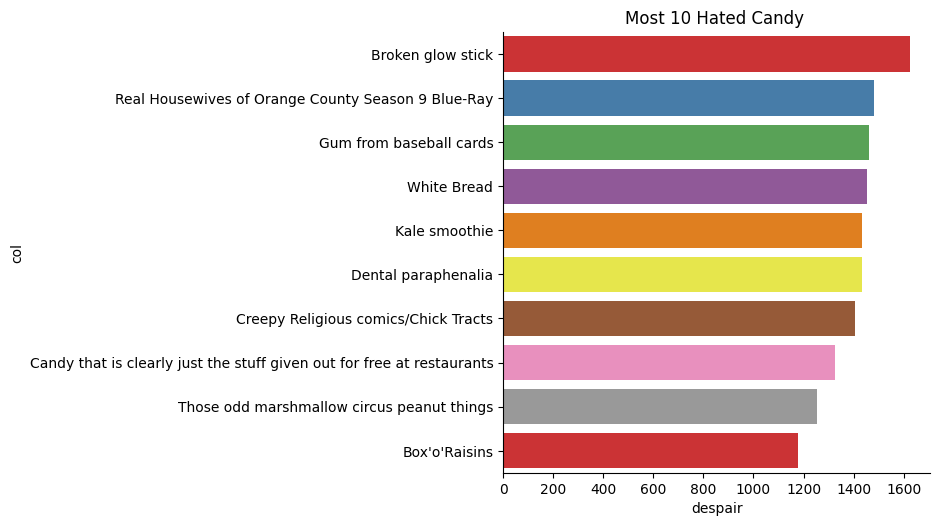

In [ ]:
dd.sort_values(by='despair',ascending=False,inplace=True)
sns.catplot(y='col',x='despair',data=dd[:10],kind='bar',palette='Set1',margin_titles=True)
plt.title('Most 10 Hated Candy ')
plt.show()

In [ ]:
df.to_excel("candy.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 14 - write a summary about all the cleaning steps

clean each column from invalid data.
fill the NaN values in each column with the suitable value.
drop some columns and rows that was not important and the survery are not affected by them.
